In [1]:
# Importing packages :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importing the Data
data = r"C:\Users\Lenovo\Documents\Data"

customers = pd.read_csv(data + '\\CUSTOMERS.csv')
geo_loc = pd.read_csv(data + '\\GEO_LOCATION.csv')
order_items = pd.read_csv(data +'\\ORDER_ITEMS.csv')
order_payments = pd.read_csv(data + '\\ORDER_PAYMENTS.csv')
order_review_ratings = pd.read_csv(data + '\\ORDER_REVIEW_RATINGS.csv')
orders = pd.read_csv(data + '\\ORDERS.csv')
products = pd.read_csv(data + '\\PRODUCTS.csv')
sellers = pd.read_csv(data + '\\SELLERS.csv')

In [3]:
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh


In [4]:
geo_loc.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh


In [5]:
order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93


In [6]:
order_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [7]:
order_review_ratings.head(2)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05


In [8]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00


In [9]:
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [10]:
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh


## 1. Perform Detailed exploratory analysis
### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [11]:
#Total revenue 
print ('Total revenue =' , round(order_items.price.sum(),2))

# Total quantity
print('Total quantity =', order_items.shape[0])

#Total products
print('Total products =', products.product_id.nunique())

#Total categories
print('Total categories =', products.product_category_name.nunique())

#Total sellers
print('Total sellers =', sellers.seller_id.nunique() )

#Total locations
print('Total locations =', geo_loc.geolocation_zip_code_prefix.nunique())

#Total payment methods
print('Total payment methods =', order_payments.payment_type.nunique())

Total revenue = 13591643.7
Total quantity = 112650
Total products = 32951
Total categories = 71
Total sellers = 3095
Total locations = 19015
Total payment methods = 5


### b. Understanding how many new customers acquired every month

In [12]:
# changing data type to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp, format = '%m/%d/%Y %H:%M')

In [13]:
orders['Year_month'] = orders.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x , format = "%Y-%m"))

In [14]:
#merging customers and orders data
cust_orders = pd.merge(customers , orders , how = 'left' , on= 'customer_id')

In [15]:
cust_month = cust_orders.loc[:, ['customer_unique_id', 'Year_month']] 

In [16]:
cust_month.drop_duplicates(subset='customer_unique_id' , inplace= True)

In [17]:
new_cust_monthly = cust_month.groupby('Year_month')[['customer_unique_id']].count()
new_cust_monthly.head(2)

,customer_unique_id
Year_month,
2016-09,4
2016-10,315


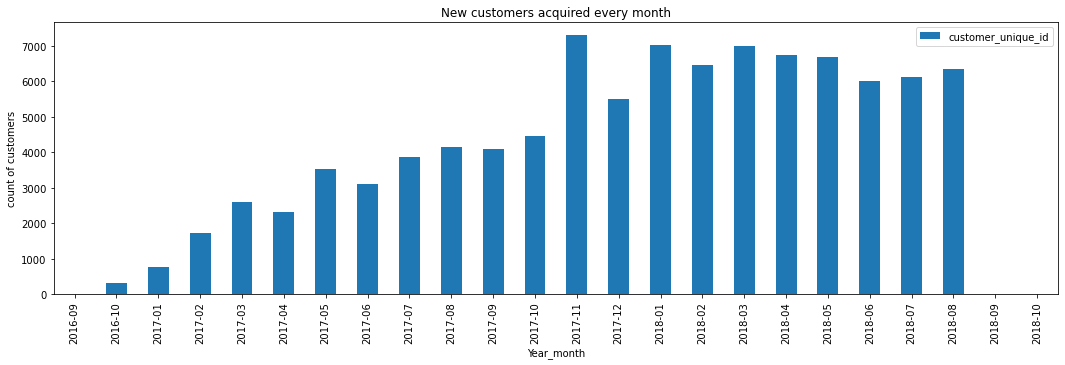

In [18]:
new_cust_monthly.plot( kind = 'bar', figsize = (18,5))
plt.ylabel('count of customers')
plt.title('New customers acquired every month')
plt.show()

### c. Understand the retention of customers on month on month basis

In [19]:
cust_monthly_cnt = cust_orders.groupby('Year_month')[['customer_unique_id']].count().reset_index()
cust_monthly_cnt.head(2)

,Year_month,customer_unique_id
0,2016-09,4
1,2016-10,324


In [20]:
cust_monthly_cnt.customer_unique_id.sum()

99441

In [21]:
retented_cust_monthly = pd.merge(new_cust_monthly , cust_monthly_cnt , how= 'left' , on ="Year_month")
retented_cust_monthly.head(2)

,Year_month,customer_unique_id_x,customer_unique_id_y
0,2016-09,4,4
1,2016-10,315,324


In [22]:
retented_cust_monthly['retented_cust'] = retented_cust_monthly.customer_unique_id_y - retented_cust_monthly.customer_unique_id_x
retented_cust_monthly.head(2)

,Year_month,customer_unique_id_x,customer_unique_id_y,retented_cust
0,2016-09,4,4,0
1,2016-10,315,324,9


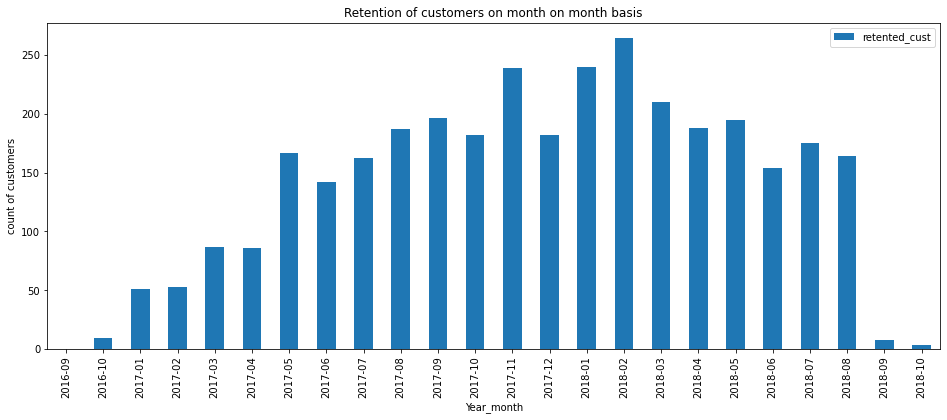

In [23]:
retented_cust_monthly.plot(kind= 'bar', x= 'Year_month' , y = 'retented_cust' , figsize = (16,6))
plt.ylabel('count of customers')
plt.title('Retention of customers on month on month basis')
plt.show()

### d. How the revenues from existing/new customers on month on month basis


In [24]:
order_item_month = pd.merge(order_items , orders , how= 'left' , on= 'order_id')

In [25]:
order_item_month['net_price'] = order_item_month.price + order_item_month.freight_value

In [26]:
rev_mouth = order_item_month.groupby('Year_month')[['net_price']].sum()
rev_mouth.head(2)

,net_price
Year_month,
2016-09,354.75
2016-10,56808.84


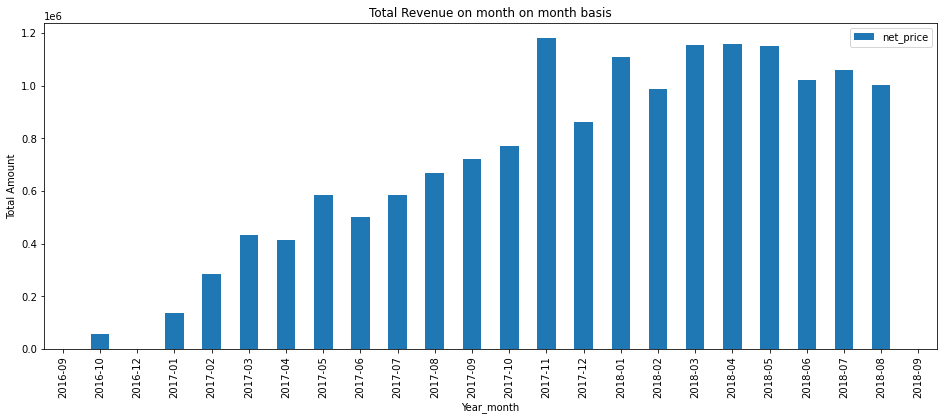

In [27]:
rev_mouth.plot( kind = 'bar', figsize =(16,6))
plt.ylabel('Total Amount')
plt.title('Total Revenue on month on month basis')
plt.show()

### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [28]:
orders_items_prod = pd.merge( order_item_month , products , how ='left' , on = 'product_id')
orders_items_prod['month'] = orders_items_prod.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x , format = "%b"))
orders_items_prod.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,net_price,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:00,...,72.19,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,Sep
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:00,...,259.83,Pet_Shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,Apr


In [29]:
# Seasonality of sales, quantity by category.
cat_qty_sales = order_items_prod.groupby('product_category_name').agg({'product_id':'count',
                                                       'price': 'sum'}).reset_index().rename(columns={'product_id':'quantity',
                                                                                                      'price':'sales'})
cat_qty_sales

NameError: name 'order_items_prod' is not defined

In [ ]:
# Seasonality of sales, quantity by Month.
month_qty_sales = orders_items_prod.groupby('month').agg({'product_id':'count',
                                                       'price': 'sum'}).reset_index().rename(columns={'product_id':'quantity',
                                                                                                      'price':'sales'})
month_qty_sales

### f. Popular Products by seller, state, category.


In [ ]:
# Popular product by sellers 

prod_seller = order_items_prod.groupby(['seller_id','product_id']).agg({'product_id':'count'}).rename(columns={'product_id':'count'}).reset_index()
prod_seller= prod_seller.sort_values(by=['seller_id','count']).drop_duplicates(subset='seller_id' ,keep='last')
prod_seller

In [ ]:
# Popular product by category
prod_cat = order_items_prod.groupby(['product_category_name','product_id']).agg({'product_id':'count'}).rename(columns={'product_id':'count'}).reset_index()
prod_cat= prod_cat.sort_values(by=['product_category_name','count']).drop_duplicates(subset='product_category_name' ,keep='last')
prod_cat

### g. Popular categories by month

In [ ]:
#orders_items_prod = pd.merge(order_item_month , products , on='product_id', how='left')
#orders_items_prod['month'] = orders_items_prod.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x , format = "%m"))

In [ ]:
# Popular category by month
cat_month = orders_items_prod.groupby(['month','product_category_name']).agg({'product_category_name':'count'}).rename(columns={'product_category_name':'count'}).reset_index()
cat_month= cat_month.sort_values(by=['month','count']).drop_duplicates(subset='month' ,keep='last')
cat_month

### h. List top 10 most expensive products sorted by price


In [ ]:
print('Top 10 most expensive products sorted by price :')
order_items.loc[:, ['product_id',
                         'price']].drop_duplicates(subset='product_id' ).sort_values(by='price',
                                                                                                ascending = False).head(10)

## 2. Performing Customers/sellers Segmentation
### a. Divide the customers into groups based on the revenue generated

In [ ]:
cust_order_item = pd.merge(cust_orders , order_items , how ='inner', on= 'order_id' )
cust_order_item.head(2)

In [ ]:
cust_order_item['net_price'] = cust_order_item.price + cust_order_item.freight_value

In [ ]:
cust_rev = cust_order_item.groupby('customer_unique_id')['net_price'].sum().reset_index()
cust_rev.rename(columns ={'net_price':'total_spend_amt'} , inplace = True)
cust_rev.head(2)

In [ ]:
cust_rev['cust_rev_group'] = pd.cut(cust_rev.total_spend_amt,
                               bins= np.arange(0 , 15000, 1000),
                               labels=['0-1000','1000-2000','2000-3000','3000-4000',
                                       '4000-5000','5000-6000','6000-7000','7000-8000','8000-9000',
                                      '9000-10000','10000-11000','11000-12000','12000-13000','13000-14000'])

In [ ]:
cust_rev.head()

### b. Divide the sellers into groups based on the revenue generated

In [ ]:
sellers_rev = order_items.groupby('seller_id')['price'].sum().reset_index()

In [ ]:
sellers_rev.rename( columns = {'price':'total_sold_amt'}, inplace= True)

In [ ]:
sellers_rev.total_sold_amt.max()

In [ ]:
sellers_rev['sellers_rev_group'] = pd.cut(sellers_rev.total_sold_amt,
                               bins= np.arange(0 , 300000, 50000),
                               labels=['0-50000','50000-100000','100000-150000','150000-200000',
                                       '200000-250000'])

In [ ]:
sellers_rev.head()

## 3. Cross-Selling (Which products are selling together)

In [ ]:
orders_order_items = pd.merge(orders , order_items , how='left' , on='order_id' )
orders_order_items.head(2)

In [ ]:
cross_selling = orders_order_items[orders_order_items.duplicated(['order_purchase_timestamp','customer_id'],
                                                                 keep=False)].sort_values(by='order_purchase_timestamp')
cross_selling = cross_selling.loc[:,['customer_id','order_purchase_timestamp','product_id' ]]

cross_selling.drop_duplicates(subset ="product_id" ,inplace=True)
cross_selling = cross_selling[cross_selling.duplicated(['order_purchase_timestamp','customer_id'],
                                                       keep=False)].sort_values(by='order_purchase_timestamp').reset_index()
cross_selling.drop(columns = 'index',axis=1, inplace=True)

print('Products with same customer id and order purchase timestamp are cross selling')
cross_selling

## 4. Payment Behaviour
### a. How customers are paying?

In [ ]:
payment_types = order_payments.payment_type.drop_duplicates().reset_index().drop(columns = 'index')

print('Customers are paying by Credit cards, UPIs, Vouchers and Debit cards.')
payment_types

### b. Which payment channels are used by most customers?

In [ ]:
payment_chnnl = order_payments.groupby('payment_type')[['payment_type']].count()
payment_chnnl = payment_chnnl.rename( columns={'payment_type':'No_of_transaction'}).sort_values(by='No_of_transaction',
                                                                                                              ascending = False).reset_index()
print('For the payments, Credit card and UPI are used by most of the customers')
payment_chnnl

## 5. Customer satisfaction towards category & product
### a. Which categories (top 10) are maximum rated & minimum rated?

In [ ]:
order_items_prod_review = pd.merge(order_items_prod, order_review_ratings ,how= 'left', on = 'order_id')
category_review = order_items_prod_review.groupby('product_category_name')['review_score'].sum().reset_index()
max_rate_cat = category_review.sort_values(by='review_score',ascending = False).head(10).reset_index().drop(columns = 'index')

print('Top ten maximum rated product categories :')
max_rate_cat

In [ ]:
min_rate_cat = category_review.sort_values(by='review_score').head(10).reset_index().drop(columns = 'index')

print('Top ten minimum rated product categories :')
min_rate_cat

### b. Which products (top10) are maximum rated & minimum rated?

In [ ]:
product_review = order_items_prod_review.groupby('product_id')['review_score'].sum().reset_index()
max_rate_prod = product_review.sort_values(by='review_score',ascending = False).head(10).reset_index().drop(columns = 'index')

print('Top ten maximum rated products :')
max_rate_prod

In [ ]:
min_rate_prod = product_review.sort_values(by='review_score').head(10).reset_index().drop(columns = 'index')

print('Top ten minimum rated products :')
min_rate_prod

### c. Average rating by location, seller,  month etc.

In [ ]:
order_review_ratings2 = pd.merge(orders, order_review_ratings, on='order_id' , how='left')
order_review_ratings2 = pd.merge(order_review_ratings2, customers, on='customer_id' , how='left')
order_review_ratings2 = pd.merge(order_review_ratings2, order_items, on='order_id' , how='left')
order_review_ratings2.head(2)

In [ ]:
# Average rating by location
avg_rating_location = order_review_ratings2.groupby('customer_state')['review_score'].mean().reset_index()
avg_rating_location.rename(columns={'customer_state':'Location', 'review_score':'Avg_review'}, inplace =True)
avg_rating_location

In [ ]:
# Average rating by seller
avg_rating_seller = order_review_ratings2.groupby('seller_id')['review_score'].mean().reset_index()
avg_rating_seller.rename(columns={'review_score':'Avg_review'}, inplace =True)
avg_rating_seller